In [1]:
#required imports
import numpy as np
import pandas as pd
import geopandas as gpd
import geodatasets
import ast
from shapely import wkt
import matplotlib.pyplot as plt
import folium

In [2]:
#reading datasets
cDem = pd.read_csv('../data/clean/commute_demographics.csv')
incomDem = pd.read_csv('../data/clean/income_demographics.csv')
eDem = pd.read_csv('../data/clean/education_demographics.csv')
interDem = pd.read_csv('../data/clean/internet_demographics.csv')
popDem = pd.read_csv('../data/clean/population_demographics.csv') 
branches = gpd.read_file('../data/clean/branches.csv')
cDem.head()

,geoid,qualifying name,current land area (sq. m),current water area (sq. m),average commute to work (in min),workers 16 years and over,"workers 16 years and over: car, truck, or van",workers 16 years and over: drove alone,workers 16 years and over: carpooled,workers 16 years and over: public transportation (includes taxicab),...,occupied housing units: 4 vehicles available,occupied housing units: 5 or more vehicles available,renter-occupied housing units,renter-occupied housing units: no vehicle available,renter-occupied housing units: 1 vehicle available,renter-occupied housing units: 2 vehicles available,renter-occupied housing units: 3 vehicles available,renter-occupied housing units: 4 vehicles available,renter-occupied housing units: 5 or more vehicles available,geometry
0,17031823303,"Census Tract 8233.03, Cook County, Illinois",2008920,0,33.0,2224,1914,1655,259,106,...,66,0,510,80,337,93,0,0,0,"POLYGON ((-87.720963 41.683952, -87.720304 41...."
1,17031823304,"Census Tract 8233.04, Cook County, Illinois",3553267,0,31.0,2650,2186,1877,309,137,...,72,20,1178,157,772,167,79,3,0,MULTIPOLYGON (((-87.72003618903081 41.68396731...
2,17031740400,"Census Tract 7404, Cook County, Illinois",2838804,0,32.0,2399,2174,2099,75,107,...,24,15,494,31,343,120,0,0,0,"POLYGON ((-87.72008 41.691274, -87.719372 41.6..."
3,17031740300,"Census Tract 7403, Cook County, Illinois",1320728,0,33.0,2430,2202,2104,98,66,...,67,8,194,0,67,127,0,0,0,"POLYGON ((-87.720431 41.698569, -87.720066 41...."
4,17031822802,"Census Tract 8228.02, Cook County, Illinois",1305003,0,32.0,1639,1425,1386,39,80,...,33,103,85,26,32,27,0,0,0,"MULTIPOLYGON (((-87.720752 41.702042, -87.7207..."


In [3]:
branches.crs = 'EPSG:4326'
print(branches.crs)

EPSG:4326


In [4]:
branches[['LATITUDE', 'LONGITUDE']] = [ast.literal_eval(x)[:2] for x in branches['LOCATION']]
branches = branches.drop(columns='LOCATION')
branches.head()

,BRANCH,HOURS OF OPERATION,ADDRESS,CITY,STATE,ZIP,PHONE,WEBSITE,PERMANENTLY_CLOSED,geometry,LATITUDE,LONGITUDE
0,Albany Park,"Mon. & Wed., 10-6; Tues. & Thurs., Noon-8; Fri...",3401 W. Foster Ave.,Chicago,IL,60625,(773) 539-5450,https://www.chipublib.org/locations/3/,0,None,41.975579,-87.713613
1,Altgeld,"Mon. & Wed., Noon-8; Tues. & Thurs., 10-6; Fri...",955 E. 131st Street,Chicago,IL,60827,(312) 747-3270,https://www.chipublib.org/locations/4/,0,None,41.657198,-87.598838
2,Archer Heights,"Mon. & Wed., Noon-8; Tues. & Thurs., 10-6; Fri...",5055 S. Archer Ave.,Chicago,IL,60632,(312) 747-9241,https://www.chipublib.org/locations/5/,0,None,41.801108,-87.726484
3,Austin,"Mon. & Wed., Noon-8; Tues. & Thurs., 10-6; Fri...",5615 W. Race Ave.,Chicago,IL,60644,(312) 746-5038,https://www.chipublib.org/locations/6/,0,None,41.889173,-87.765820
4,Austin-Irving,"Mon. & Wed., Noon-8; Tues. & Thurs., 10-6; Fri...",6100 W. Irving Park Rd.,Chicago,IL,60634,(312) 744-6222,https://www.chipublib.org/locations/7/,0,None,41.953123,-87.779285


In [5]:
# Your code here: Visualize the hospital locations
m = folium.Map(location=[41.857198, -87.623177], zoom_start=10)

locationsLib = branches[['LATITUDE','LONGITUDE']]
locationLiblist = locationsLib.values.tolist()


for point in range(0,len(locationLiblist)):
    folium.Marker(locationLiblist[point]).add_to(m)
    
m

In [6]:
popDem = gpd.GeoDataFrame(
    popDem.loc[:, [c for c in popDem.columns if c != "geometry"]],
    geometry=gpd.GeoSeries.from_wkt(popDem["geometry"]),
    crs="epsg:4326",
)

In [7]:
popDem.head()

,geoid,qualifying name,current land area (sq. m),current water area (sq. m),total population,population density (per sq. mile),total population: male,total population: female,total: under 5 years,total: 5 to 9 years,...,total population: female: 75 to 84 years,total population: female: 85 years and over,total population: white alone,total population: black or african american alone,total population: american indian and alaska native alone,total population: asian alone,total population: native hawaiian and other pacific islander alone,total population: some other race alone,total population: two or more races,geometry
0,17031823303,"Census Tract 8233.03, Cook County, Illinois",2008920,0,4059,5233.042,1883,2176,191,402,...,160,26,3230,317,40,0,0,296,176,"POLYGON ((-87.72096 41.68395, -87.72030 41.683..."
1,17031823304,"Census Tract 8233.04, Cook County, Illinois",3553267,0,6316,4603.753,3354,2962,384,404,...,138,101,3811,1923,11,52,0,236,283,"MULTIPOLYGON (((-87.72004 41.68397, -87.72006 ..."
2,17031740400,"Census Tract 7404, Cook County, Illinois",2838804,0,4738,4322.723,2164,2574,321,289,...,111,49,4169,275,0,155,0,0,139,"POLYGON ((-87.72008 41.69127, -87.71937 41.691..."
3,17031740300,"Census Tract 7403, Cook County, Illinois",1320728,0,5017,9838.490,2551,2466,344,370,...,58,60,4546,78,0,42,0,168,183,"POLYGON ((-87.72043 41.69857, -87.72007 41.698..."
4,17031822802,"Census Tract 8228.02, Cook County, Illinois",1305003,0,3750,7442.477,1845,1905,207,430,...,144,60,3184,185,5,71,0,84,221,"MULTIPOLYGON (((-87.72075 41.70204, -87.72075 ..."


In [8]:
#checking crs
print(popDem.crs)

epsg:4326


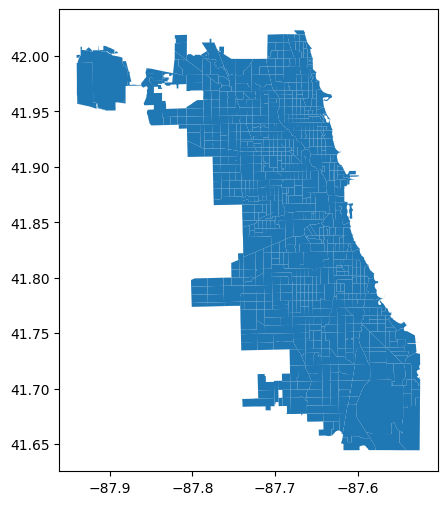

In [9]:
#checking map
popDem.plot(figsize=(6, 6))
plt.show()

In [52]:
for _, r in popDem.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = gpd.GeoSeries(r["geometry"]).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {"fillColor": "white"})
    folium.Popup(r["qualifying name"]).add_to(geo_j)
    geo_j.add_to(m)
m

In [12]:
# Project to NAD83 projected crs
popDem = popDem.to_crs(epsg=2263)

# Access the centroid attribute of each polygon
popDem["centroid"] = popDem.centroid
popDem["centroid"] = popDem["centroid"].to_crs(epsg=4326)
popDem.head()

,geoid,qualifying name,current land area (sq. m),current water area (sq. m),total population,population density (per sq. mile),total population: male,total population: female,total: under 5 years,total: 5 to 9 years,...,total population: female: 85 years and over,total population: white alone,total population: black or african american alone,total population: american indian and alaska native alone,total population: asian alone,total population: native hawaiian and other pacific islander alone,total population: some other race alone,total population: two or more races,geometry,centroid
0,17031823303,"Census Tract 8233.03, Cook County, Illinois",2008920,0,4059,5233.042,1883,2176,191,402,...,26,3230,317,40,0,0,296,176,"POLYGON ((-2748842.862 845797.964, -2748664.41...",POINT (-87.72056 41.68396)
1,17031823304,"Census Tract 8233.04, Cook County, Illinois",3553267,0,6316,4603.753,3354,2962,384,404,...,101,3811,1923,11,52,0,236,283,"MULTIPOLYGON (((-2748591.897 845763.980, -2748...",POINT (-87.69341 41.68839)
2,17031740400,"Census Tract 7404, Cook County, Illinois",2838804,0,4738,4322.723,2164,2574,321,289,...,49,4169,275,0,155,0,0,139,"POLYGON ((-2748188.360 848396.029, -2747996.65...",POINT (-87.71907 41.68723)
3,17031740300,"Census Tract 7403, Cook County, Illinois",1320728,0,5017,9838.490,2551,2466,344,370,...,60,4546,78,0,42,0,168,183,"POLYGON ((-2747868.358 851036.967, -2747769.48...",POINT (-87.71072 41.69507)
4,17031822802,"Census Tract 8228.02, Cook County, Illinois",1305003,0,3750,7442.477,1845,1905,207,430,...,60,3184,185,5,71,0,84,221,"MULTIPOLYGON (((-2747757.520 852300.821, -2747...",POINT (-87.72062 41.69860)


In [37]:
#mCentroid = m;
#for _, r in popDem.iterrows():
 #   lat = r["centroid"].y
  #  lon = r["centroid"].x
   # folium.Marker(
    #    location=[lat, lon], icon=folium.Icon(color='green')
    #).add_to(mCentroid)
    
#mCentroid

In [13]:
popDem['lon'] = popDem['centroid'].apply(lambda p: p.x)
popDem['lat'] = popDem['centroid'].apply(lambda p: p.y)

In [14]:
popDem.head()

,geoid,qualifying name,current land area (sq. m),current water area (sq. m),total population,population density (per sq. mile),total population: male,total population: female,total: under 5 years,total: 5 to 9 years,...,total population: black or african american alone,total population: american indian and alaska native alone,total population: asian alone,total population: native hawaiian and other pacific islander alone,total population: some other race alone,total population: two or more races,geometry,centroid,lon,lat
0,17031823303,"Census Tract 8233.03, Cook County, Illinois",2008920,0,4059,5233.042,1883,2176,191,402,...,317,40,0,0,296,176,"POLYGON ((-2748842.862 845797.964, -2748664.41...",POINT (-87.72056 41.68396),-87.720562,41.683959
1,17031823304,"Census Tract 8233.04, Cook County, Illinois",3553267,0,6316,4603.753,3354,2962,384,404,...,1923,11,52,0,236,283,"MULTIPOLYGON (((-2748591.897 845763.980, -2748...",POINT (-87.69341 41.68839),-87.693408,41.688393
2,17031740400,"Census Tract 7404, Cook County, Illinois",2838804,0,4738,4322.723,2164,2574,321,289,...,275,0,155,0,0,139,"POLYGON ((-2748188.360 848396.029, -2747996.65...",POINT (-87.71907 41.68723),-87.719067,41.687231
3,17031740300,"Census Tract 7403, Cook County, Illinois",1320728,0,5017,9838.490,2551,2466,344,370,...,78,0,42,0,168,183,"POLYGON ((-2747868.358 851036.967, -2747769.48...",POINT (-87.71072 41.69507),-87.710716,41.695070
4,17031822802,"Census Tract 8228.02, Cook County, Illinois",1305003,0,3750,7442.477,1845,1905,207,430,...,185,5,71,0,84,221,"MULTIPOLYGON (((-2747757.520 852300.821, -2747...",POINT (-87.72062 41.69860),-87.720622,41.698600


In [16]:
heatMap = popDem[['lat','lon', 'total population']]
heatMapList = heatMap.values.tolist()

In [17]:
from folium.plugins import HeatMap
HeatMap(data=heatMapList).add_to(m)

In [18]:
m